In [ ]:
import pandas as pd

In [ ]:
sd = pd.read_csv("/content/imdb_top_1000.csv")

In [ ]:
# 1. What is the size of the dataset? How many movies are included?
sd.shape

(1000, 16)

In [ ]:
# 1. What is the size of the dataset? How many movies are included?
sd.shape[0]

1000

In [ ]:
# 2. What are the features (columns) present in the dataset? What does each feature represent?
sd.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [ ]:
sd.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


16000

In [ ]:
# 3. Are there any missing values in the dataset? If so, how should they be handled?
sd.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [ ]:

sd = sd.dropna()

In [ ]:
sd.isnull().sum()

Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

In [ ]:
import seaborn as sns

<Axes: xlabel='IMDB_Rating', ylabel='Count'>

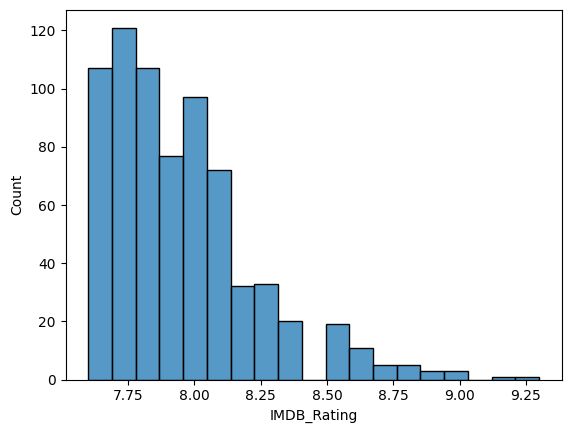

In [ ]:
# 4. What is the distribution of movie ratings? Are they skewed towards positive or negative ratings?
sns.histplot(sd["IMDB_Rating"])

In [ ]:
print(f"Skewness: {sd['IMDB_Rating'].skew()}")

Skewness: 1.189616072796421


In [ ]:
print(f"Kurtosis: {sd['IMDB_Rating'].kurt()}")

Kurtosis: 1.6514520827238934


In [ ]:
sd.corr()

<ipython-input-19-f27203b91215>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sd.corr()


,IMDB_Rating,Meta_score,No_of_Votes
IMDB_Rating,1.000000,0.280894,0.623142
Meta_score,0.280894,1.000000,0.029744
No_of_Votes,0.623142,0.029744,1.000000


In [ ]:
# Outliers
# Identify outliers based on a specific column (e.g., 'value_column')
value_column = 'IMDB_Rating'

outliers = sd[(sd[value_column] < sd[value_column].mean() - 4 * sd[value_column].std()) |
              (sd[value_column] > sd[value_column].mean() + 4 * sd[value_column].std())]

print("Outliers:\n")
outliers

Outliers:



,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"


In [ ]:
""# Outliers
# Identify outliers based on a specific column (e.g., 'value_column')
value_column = 'Meta_score'

outliers = sd[(sd[value_column] < sd[value_column].mean() - 4 * sd[value_column].std()) |
              (sd[value_column] > sd[value_column].mean() + 4 * sd[value_column].std())]

print("Outliers:\n")
outliers

Outliers:



,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross


In [ ]:
sd.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [ ]:
# 7. What are the most common genres among the movies in the dataset?
sd['Genre'].value_counts().sort_values(ascending = False)

Drama                         58
Drama, Romance                26
Comedy, Drama                 24
Crime, Drama, Thriller        22
Action, Adventure, Sci-Fi     21
                              ..
Horror, Thriller               1
Horror, Sci-Fi                 1
Animation, Comedy, Fantasy     1
Drama, Family, Fantasy         1
Comedy, Music, Musical         1
Name: Genre, Length: 172, dtype: int64

<ipython-input-29-aa9b64c58b15>:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x="Genre", y="IMDB_Rating", data=sd, palette="Dark2", s=80)


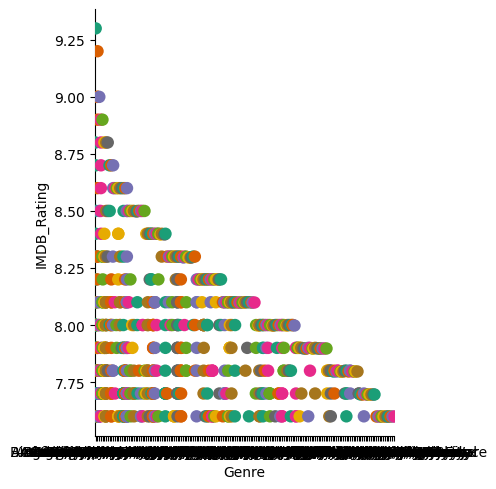

In [ ]:
sns.catplot(x="Genre", y="IMDB_Rating", data=sd, palette="Dark2", s=80)

<ipython-input-27-b5479c4b3d90>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="Genre", y="IMDB_Rating", data=sd, palette="Dark2", s=80)


<Axes: xlabel='Genre', ylabel='IMDB_Rating'>

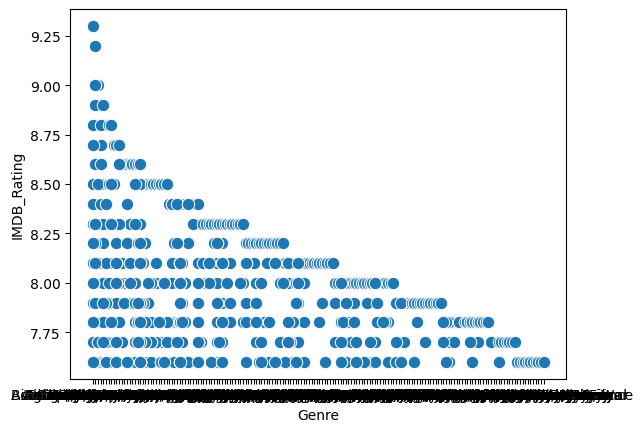

In [ ]:
sns.scatterplot(x="Genre", y="IMDB_Rating", data=sd, palette="Dark2", s=80)

<ipython-input-33-430a668b7503>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = sd.corr()


<Axes: >

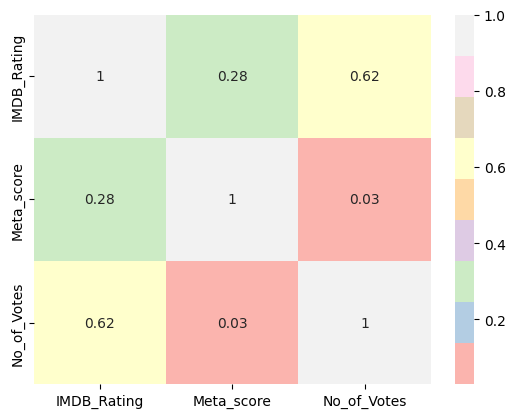

In [ ]:
correlation_matrix = sd.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Pastel1')

In [ ]:
sd.sort_values(by ='IMDB_Rating',ascending = False)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,https://m.media-amazon.com/images/M/MV5BMTg0Nj...,Sherlock Holmes,2009,PG-13,128 min,"Action, Adventure, Mystery",7.6,Detective Sherlock Holmes and his stalwart par...,57.0,Guy Ritchie,Robert Downey Jr.,Jude Law,Rachel McAdams,Mark Strong,583158,"209,028,679"
912,https://m.media-amazon.com/images/M/MV5BMTU5MD...,Zombieland,2009,A,88 min,"Adventure, Comedy, Fantasy",7.6,A shy student trying to reach his family in Oh...,73.0,Ruben Fleischer,Jesse Eisenberg,Emma Stone,Woody Harrelson,Abigail Breslin,520041,"75,590,286"
911,https://m.media-amazon.com/images/M/MV5BYmFmNj...,La piel que habito,2011,R,120 min,"Drama, Horror, Thriller",7.6,"A brilliant plastic surgeon, haunted by past t...",70.0,Pedro Almodóvar,Antonio Banderas,Elena Anaya,Jan Cornet,Marisa Paredes,138959,"3,185,812"
910,https://m.media-amazon.com/images/M/MV5BMjAxOT...,Moneyball,2011,PG-13,133 min,"Biography, Drama, Sport",7.6,Oakland A's general manager Billy Beane's succ...,87.0,Bennett Miller,Brad Pitt,Robin Wright,Jonah Hill,Philip Seymour Hoffman,369529,"75,605,492"


<Axes: xlabel='Released_Year'>

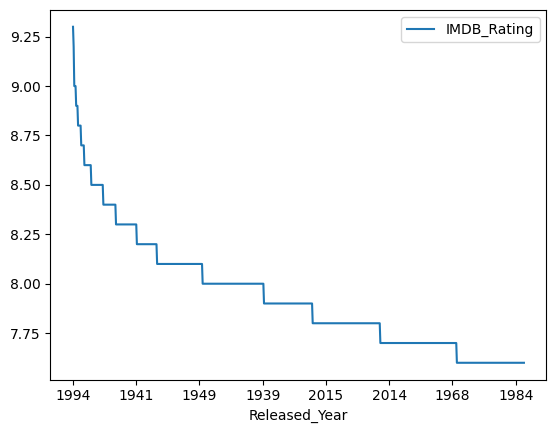

In [ ]:
sd.plot(x = 'Released_Year', y = 'IMDB_Rating')

In [ ]:
# 4. What is the distribution of movie ratings? Are they skewed towards positive or negative ratings?
plt.hist(sd['Rating'], bins=10, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Ratings')
plt.show()

In [ ]:
# 5. Is there a relationship between movie ratings and the number of votes or reviews?
plt.scatter(sd['Votes'], sd['Rating'])
plt.xlabel('Number of Votes')
plt.ylabel('Rating')
plt.title('Rating vs. Number of Votes')
plt.show()

In [ ]:
# 6. Are there any outliers in the movie ratings or other numerical features? If so, how should they be treated?
plt.boxplot(sd['Rating'])
plt.ylabel('Rating')
plt.title('Boxplot of Movie Ratings')
plt.show()

In [ ]:
# 7. What are the most common genres among the movies in the dataset?
genre_counts = sd['Genre'].value_counts()
print("Most common genres:")
print(genre_counts.head(10))

In [ ]:
# 8. How does the distribution of movie genres affect the ratings?
avg_rating_by_genre = sd.groupby('Genre')['Rating'].mean().sort_values(ascending=False)
print("Average rating by genre:")
print(avg_rating_by_genre.head(10))

In [ ]:
# 9. Is there a correlation between the movie's budget and its rating?
plt.scatter(sd['Budget'], sd['Rating'])
plt.xlabel('Budget')
plt.ylabel('Rating')
plt.title('Rating vs. Budget')
plt.show()

In [ ]:
# 10. What are the top-rated movies in the dataset? What are their common characteristics?
top_rated_movies = sd.nlargest(10, 'Rating')
print("Top 10 rated movies:")
print(top_rated_movies[['Title', 'Genre', 'Rating', 'Votes']])

In [ ]:
# 11. Are there any temporal trends in movie ratings over the years?
# Assuming you have a 'Release_Year' column in the dataset representing the year of movie release.
plt.scatter(sd['Release_Year'], sd['Rating'])
plt.xlabel('Release Year')
plt.ylabel('Rating')
plt.title('Rating Trends Over the Years')
plt.show()

In [ ]:
# 12. How do the movie ratings vary across different countries or regions?
# Assuming you have a 'Country' column in the dataset representing the country of origin.
avg_rating_by_country = sd.groupby('Country')['Rating'].mean().sort_values(ascending=False)
print("Average rating by country:")
print(avg_rating_by_country.head(10))

In [ ]:
# 13. Are there any specific directors or actors associated with higher-rated movies?
# Assuming you have 'Director' and 'Actors' columns in the dataset.
top_directors = sd.groupby('Director')['Rating'].mean().nlargest(10)
top_actors = sd.groupby('Actors')['Rating'].mean().nlargest(10)
print("Top 10 directors with highest average rating:")
print(top_directors)
print("\nTop 10 actors with highest average rating:")
print(top_actors)

In [ ]:
# 14. Can we identify any patterns based on movie duration and ratings?
plt.scatter(sd['Duration'], sd['Rating'])
plt.xlabel('Duration')
plt.ylabel('Rating')
plt.title('Rating vs. Movie Duration')
plt.show()

In [ ]:
# 15. How do the movie ratings differ across various film certification categories (e.g., G, PG, PG-13, R)?
# Assuming you have a 'Certificate' column in the dataset representing the film certification category.
avg_rating_by_certificate = sd.groupby('Certificate')['Rating'].mean().sort_values(ascending=False)
print("Average rating by certificate:")
print(avg_rating_by_certificate)

In [ ]:
# 16. Are certain production studios associated with higher-rated movies?
# Assuming you have a 'Production_Studio' column in the dataset.
top_studios = sd.groupby('Production_Studio')['Rating'].mean().nlargest(10)
print("Top 10 production studios with highest average rating:")
print(top_studios)

In [ ]:
# 17. Is there a relationship between the movie runtime and its rating?
plt.scatter(sd['Runtime'], sd['Rating'])
plt.xlabel('Runtime')
plt.ylabel('Rating')
plt.title('Rating vs. Movie Runtime')
plt.show()

In [ ]:
# 18. How do movie budgets vary with respect to genres and ratings?
avg_budget_by_genre = sd.groupby('Genre')['Budget'].mean().sort_values(ascending=False)
print("Average budget by genre:")
print(avg_budget_by_genre.head(10))

In [ ]:
# 19. Can we identify any seasonal trends or patterns in movie ratings?
# Assuming you have a 'Release_Month' column in the dataset representing the month of movie release.
avg_rating_by_month = sd.groupby('Release_Month')['Rating'].mean()
print("Average rating by month of release:")
print(avg_rating_by_month)

In [ ]:
# 20. Are there any specific genres that tend to have longer movie runtimes?
avg_runtime_by_genre = sd.groupby('Genre')['Runtime'].mean().sort_values(ascending=False)
print("Average runtime by genre:")
print(avg_runtime_by_genre.head(10))